In [19]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [20]:
PROJECT_DIR = r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project"
DATA_DIR     = os.path.join(PROJECT_DIR, "data")
RAW_FILE     = os.path.join(DATA_DIR, "processed.cleveland.csv")   
CLEAN_FILE   = os.path.join(DATA_DIR, "processed_clean.csv")       

In [21]:
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]

df = pd.read_csv(RAW_FILE,header=None, names=columns,na_values=["?"])

print("The first 5 rows :")
display(df.head())

print("Total lost values before cleaning:")
display(df.isna().sum())

The first 5 rows :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Total lost values before cleaning:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [22]:

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    
numeric_features      = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features  = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

for col in numeric_features:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

for col in categorical_features:
    if col in df.columns:
        mode_val = df[col].mode(dropna=True)
        if not mode_val.empty:
            df[col] = df[col].fillna(mode_val.iloc[0])


In [23]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [24]:
print("The missing values after compensation:")
display(df.isna().sum())

The missing values after compensation:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

target
0    164
1    139
Name: count, dtype: int64

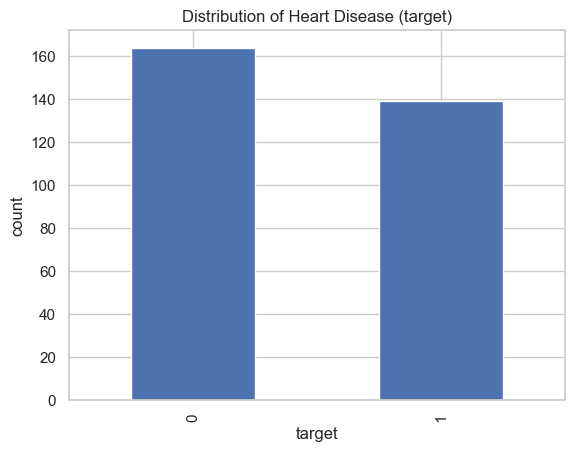

In [25]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
display(df["target"].value_counts().sort_index())

plt.figure()
df["target"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Heart Disease (target)")
plt.xlabel("target")
plt.ylabel("count")
plt.show()

<Figure size 640x480 with 0 Axes>

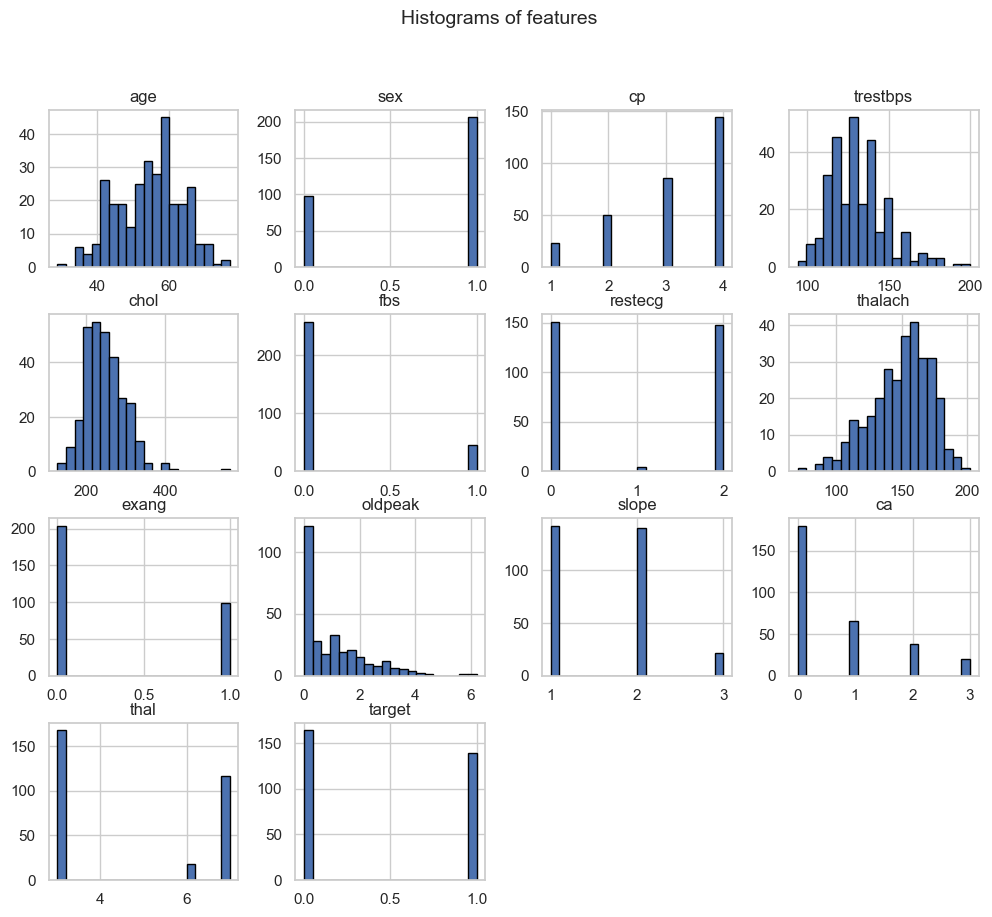

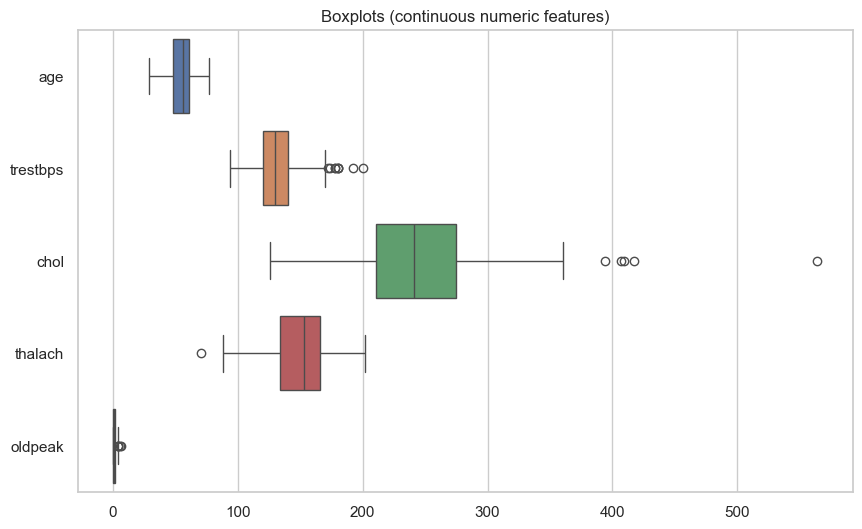

In [26]:

plt.figure()
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of features", fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_features], orient="h")
plt.title("Boxplots (continuous numeric features)")
plt.show()

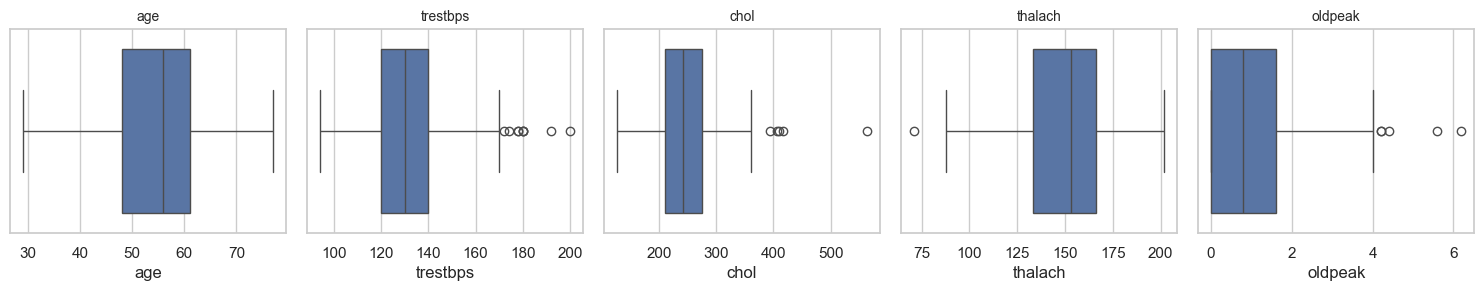

In [27]:
numeric_columns = df[numeric_features].columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 5, i) 
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

In [28]:

print("(IQR method):")
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    perc  = n_out / len(df) * 100
    print(f"{col}: {n_out} Outlier ({perc:.2f}%)")

(IQR method):
age: 0 Outlier (0.00%)
trestbps: 9 Outlier (2.97%)
chol: 5 Outlier (1.65%)
thalach: 1 Outlier (0.33%)
oldpeak: 5 Outlier (1.65%)


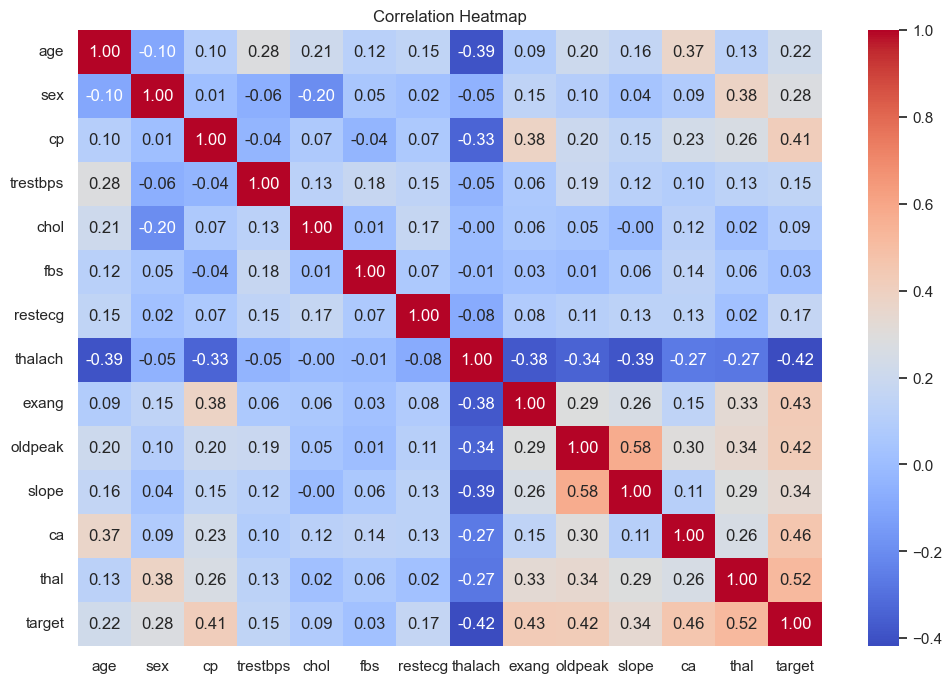

The most correlated columns with the target:


target      1.000000
thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64

In [29]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print("The most correlated columns with the target:")
display(corr["target"].sort_values(ascending=False))

In [30]:
df.to_csv(CLEAN_FILE, index=False)
print(f"Save the clean copy here: {CLEAN_FILE}")

Save the clean copy here: D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\processed_clean.csv
